In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load Data

In [2]:
df = pd.read_csv('../data/data_visual.csv',sep=',')
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_group,contact_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350000,1,-1,0,unknown,no,employee,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.516667,1,-1,0,unknown,no,employee,unknown


In [3]:
df['y_num'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [4]:
list_balgroup = []

for i, x in df.iterrows():
    if x['balance'] <= 0 :
        balgroup = '<= 0'
    elif x['balance'] >=1 and x['balance'] <= 286 :
        balgroup = '1 - 286'    
    elif x['balance'] >=287 and x['balance'] <= 572 :
        balgroup = '287 - 572'    
    elif x['balance'] >=573 and x['balance'] <= 857 :
        balgroup = '573 - 857'    
    elif x['balance'] >=858 and x['balance'] <= 1142 :
        balgroup = '858 - 1142'        
    elif x['balance'] >=1143 and x['balance'] <= 1427 :
        balgroup = '1143 - 1427'   
    elif x['balance'] >= 1428   :
        balgroup = '>= 1428'
        
        
    else:
        balgroup = 'unknown'
    list_balgroup.append(balgroup)

df['balgroup'] = list_balgroup

In [5]:
list_agegroup = []

for i, x in df.iterrows():
    if x['age'] >= 18 and x['age'] <= 33:
        agegroup = '18 - 33'
    elif x['age'] >= 34 and x['age'] <= 49:
        agegroup = '34 - 49'
    elif x['age'] >= 50 and x['age'] <= 65:
        agegroup = '50 - 65'
    elif x['age'] >= 66 and x['age'] <= 81:
        agegroup = '66 - 81'      
    elif x['age'] >= 82 and x['age'] <= 97:
        agegroup = '82 - 97'

    list_agegroup.append(agegroup)

df['age_group'] = list_agegroup

# EDA

## Outlier (Distribution of the data)

Almost all numerical data are not normally distributed. Removing outliers from this data is quite risky because of the large amount of it.

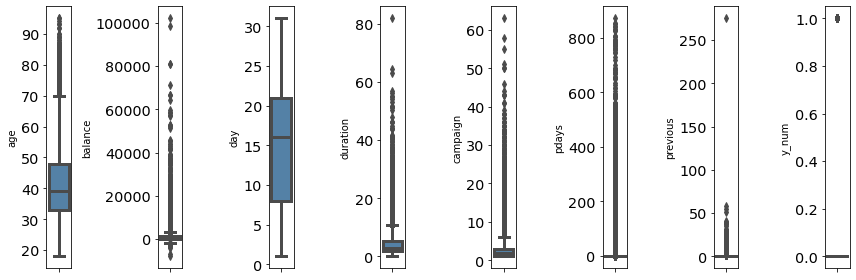

In [6]:
num_dtypes = ['int16','int32','int64','float16','float32','float64']
num_df = df.select_dtypes(include=num_dtypes)
numericals = num_df.columns

for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='steelblue', orient='v')
    plt.tight_layout()

## Target (Conversion Rate of Campaign)

Target `y` represents the number of customers who opened deposit accounts (conversion rate). Conversion rate of this campaign is around 12%.

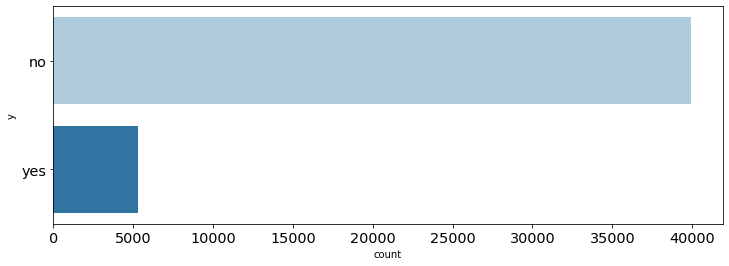

In [7]:
sns.countplot(data=df, y='y', palette='Paired');

## Age

<AxesSubplot:xlabel='age', ylabel='y'>

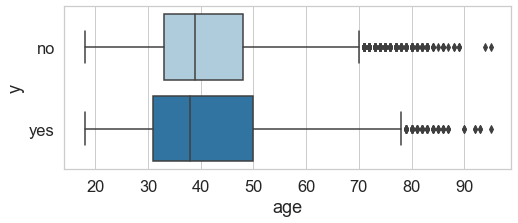

In [8]:
sns.set(rc={'figure.figsize':(8,3)}, font_scale=1.5, style='whitegrid')
sns.boxplot(data=df, x="age", y="y", order = df["y"].value_counts().index, palette='Paired')

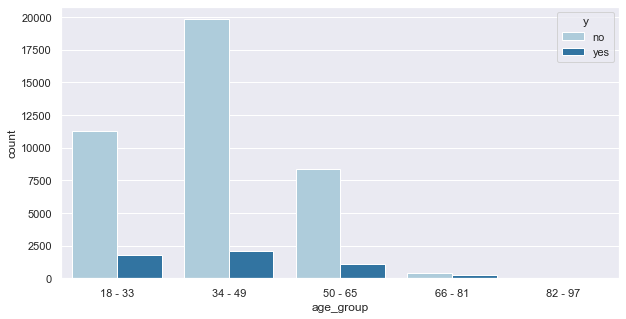

In [9]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
job = sns.countplot(x="age_group", data = df, hue = "y", palette='Paired', order = ['18 - 33', '34 - 49', '50 - 65','66 - 81', '82 - 97'])
plt.show()

## Loan - Default - Housing

`loan`, `default`, and `housing` are features that describe the condition of customer's debt to the bank. From these three features, it shows that customers who do not have a `default`, `housing`, or `loan` tend to open a deposit account.

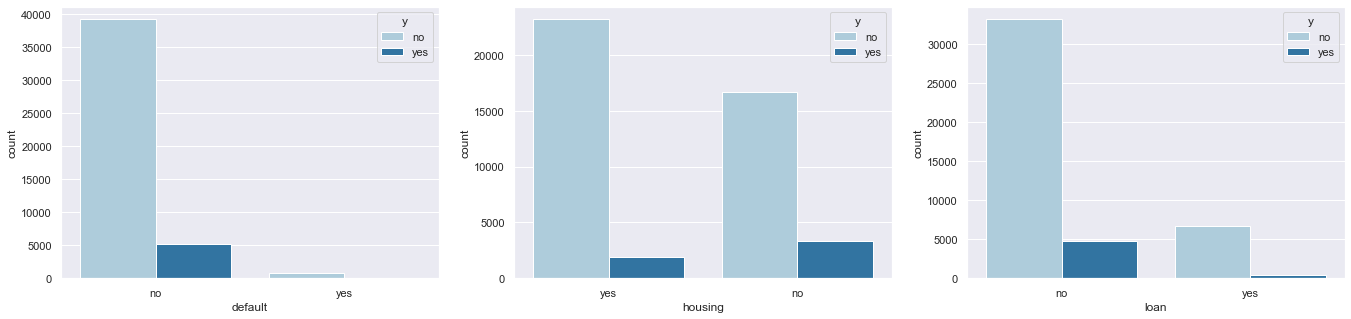

In [10]:
fig, ax = plt.subplots(1,3,figsize=(23, 5))

sns.countplot(data=df, x='default', hue='y', ax = ax[0], palette='Paired')
sns.countplot(data=df, x = 'housing', hue = 'y', ax = ax[1], palette='Paired')
sns.countplot(data=df, x = 'loan', hue = 'y', ax = ax[2], palette='Paired');

## Job Group

Based on proportion, customers who doesn't have an active income such as 'student', 'retired' and 'unemployed'. 

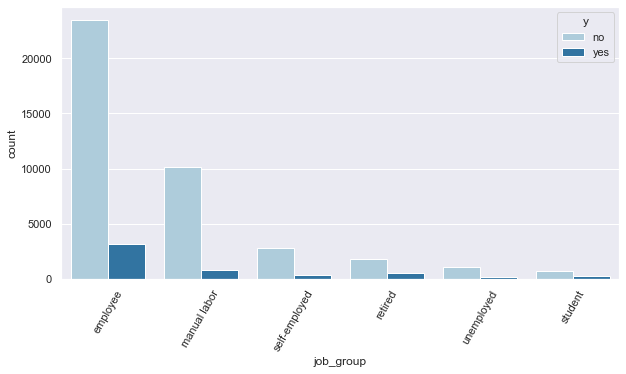

In [11]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
job = sns.countplot(x="job_group", data = df, hue = "y", order = df["job_group"].value_counts().index, palette="Paired")
job.tick_params(axis='x', rotation=60)
plt.show()

Text(0, 0.5, 'Probability')

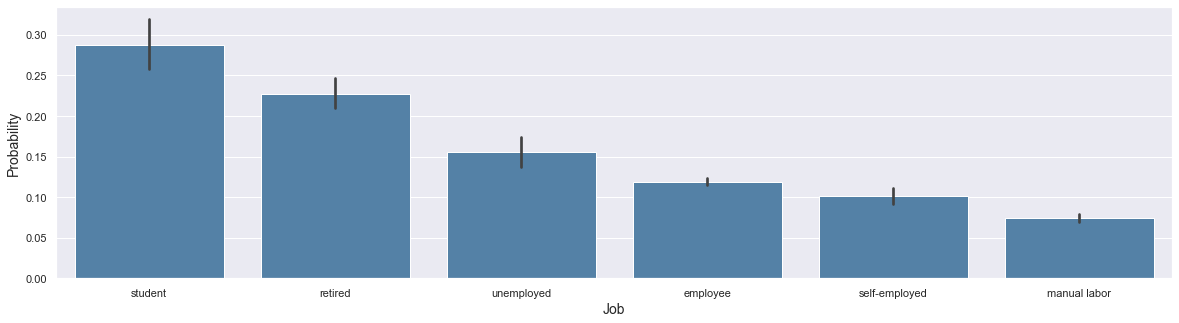

In [12]:
plt.figure( figsize = (20, 5))
sns.barplot(data = df, x = 'job_group', y = 'y_num', color='steelblue', order=['student', 'retired', 'unemployed', 'employee', 'self-employed', 'manual labor'])
plt.xlabel("Job", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)

## Marital

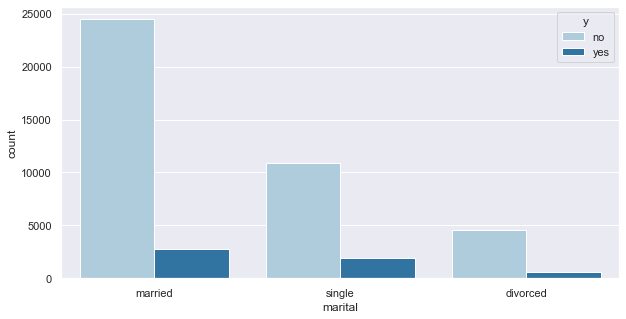

In [13]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
marital = sns.countplot(x="marital", data = df, hue = "y", order = df["marital"].value_counts().index, palette="Paired")
plt.show()

Text(0, 0.5, 'Probability')

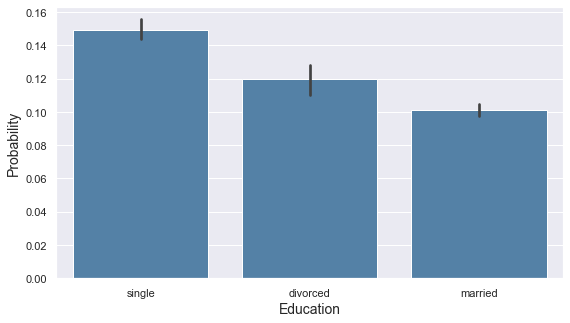

In [14]:
plt.figure( figsize = (20, 5))
plt.subplot(121)
sns.barplot(data = df, x = 'marital', y = 'y_num', color='steelblue', order=['single', 'divorced', 'married'])
plt.xlabel("Education", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)

## Education

Customers with `education` 'secondary' and 'tertiary' have the same numbers of opening deposit account, with 'tertiary' have higher conversion rate.

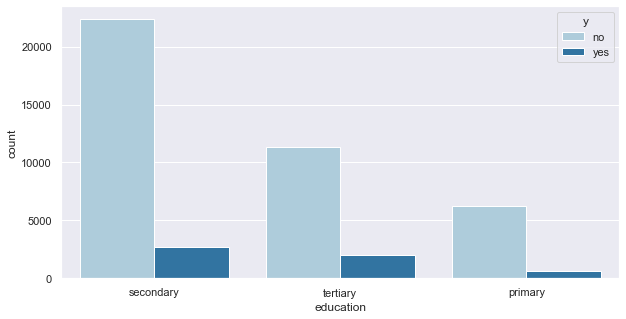

In [15]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
sns.countplot(x="education", data = df, hue = "y", order = df["education"].value_counts().index, palette="Paired")
plt.show()

Text(0, 0.5, 'Probability')

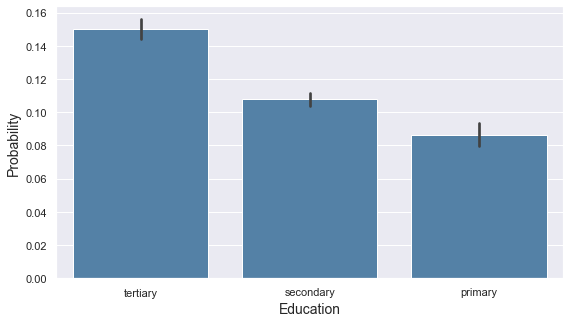

In [16]:
plt.figure( figsize = (20, 5))
plt.subplot(121)
sns.barplot(data = df, x = 'education', y = 'y_num', color='steelblue')
plt.xlabel("Education", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)

## Contact

Customers that have been contacted personally with team marketing tend to open a deposit account. Customer that have been contacted with 'cellular' have more in numbers because it is easier to contact people by phone cellular than telephone. When viewed from the proportion between those who open and not open accounts from customers with `contact` 'cellular' and 'telephone', the number between the two is not different. Thus, it can be said that, whether customers are contacted with 'cellular' or 'telephone' did not have any impact on the conversion rate.

<AxesSubplot:xlabel='contact', ylabel='count'>

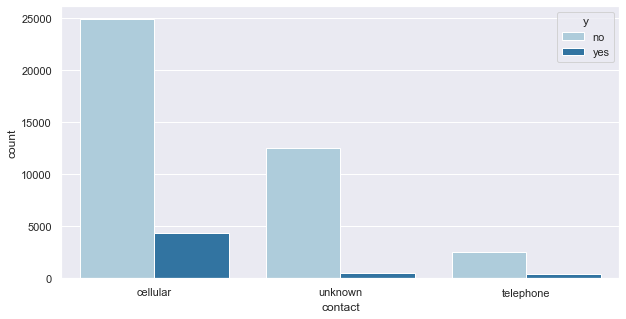

In [17]:
sns.countplot(data=df, x='contact', hue = 'y', palette='Paired', order = df["contact"].value_counts().index)

Text(0, 0.5, 'Probability')

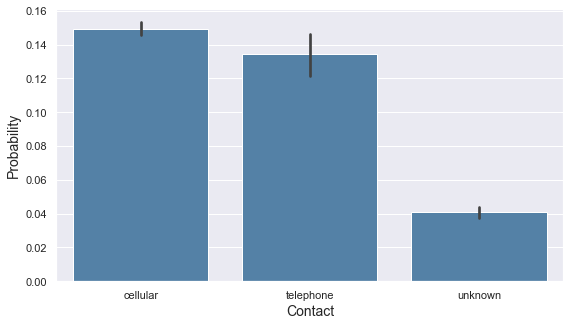

In [18]:
plt.figure( figsize = (20, 5))
plt.subplot(121)
sns.barplot(data = df, x = 'contact', y = 'y_num', color='steelblue', order=['cellular', 'telephone', 'unknown'])
plt.xlabel("Contact", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)

## Balance

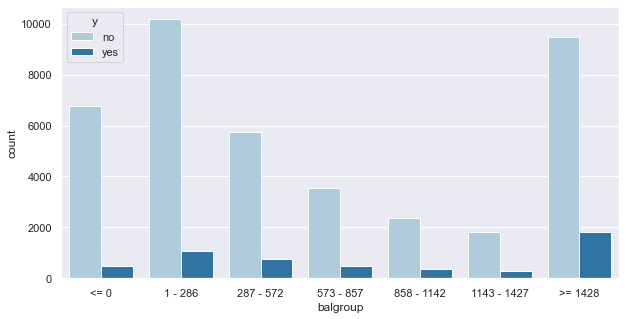

In [19]:
sns.countplot(data=df, x='balgroup', hue='y', palette='Paired', order=['<= 0', '1 - 286', '287 - 572', '573 - 857', '858 - 1142', '1143 - 1427', '>= 1428']);

## Poutcome (Previous campaign outcome)

`poutcome` dominated with 'unknown' values, means bank tend to contact new customers who never been exposed to another campaign. However, when viewed from proportion, customers who `success` in previous campaign tend to open an account for this campaign, means customers are satisfied with the product and more likely to subsribe to the next campaign. 

<AxesSubplot:xlabel='poutcome', ylabel='count'>

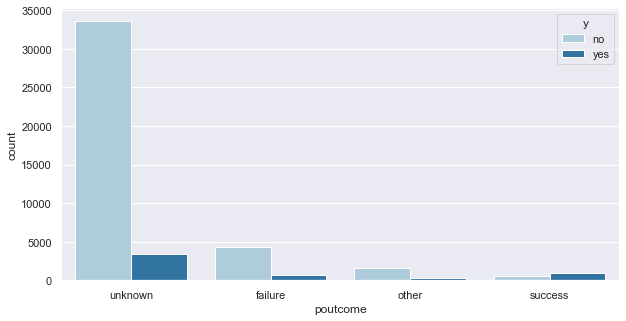

In [20]:
sns.countplot(data=df, x='poutcome', hue = 'y', palette='Paired', order = df["poutcome"].value_counts().index)

Text(0, 0.5, 'Probability')

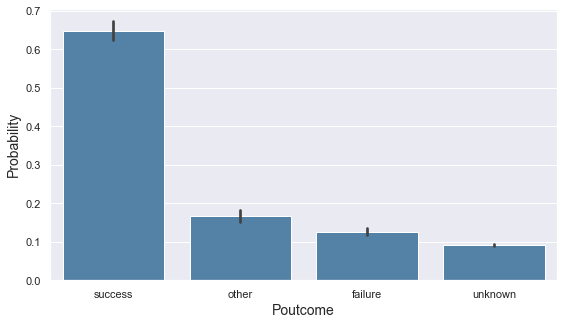

In [21]:
plt.figure( figsize = (20, 5))
plt.subplot(121)
sns.barplot(data = df, x = 'poutcome', y = 'y_num', color='steelblue', order=['success', 'other', 'failure', 'unknown'])
plt.xlabel("Poutcome", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)